In [12]:
from pdf2image import convert_from_path
from pdf2image.exceptions import (PDFInfoNotInstalledError, PDFPageCountError, PDFSyntaxError)
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.cluster import AgglomerativeClustering
from pytesseract import Output
from tabulate import tabulate
import pandas as pd
import numpy as np
import pytesseract
import argparse
import imutils
import cv2

In [13]:

# extract pages from pdf into JPG
pages = convert_from_path('/home/pop-jaroso/Desktop/Table detection/Code/102.pdf')

for i in range(len(pages)):

   pages[i].save('page'+ str(i) +'.jpg', 'JPEG')

In [14]:
file = r'page0.jpg'
im1 = cv2.imread(file,0)
im = cv2.imread(file)

In [15]:
# estableciendo los limites superior e inferior e invirtiendolos
ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

# estableciendo el el kernel y eliminando la imagen
kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

# busqueda de los contornos
contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# se guardan las coordendas de los contronos
cordinates = []
for cnt in contours:
 x,y,w,h = cv2.boundingRect(cnt)
 cordinates.append((x,y,w,h))
 #bounding the images
 if y< 50:
 
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)

True

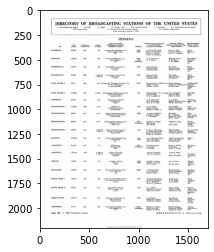

In [16]:
plt.imshow(im)
#cv2.namedWindow('detecttable', cv2.WINDOW_NORMAL)
cv2.imwrite('detecttable.jpg',im)